# Qiskit: Basics on Python and Quantum Computing
### By: Nishan Karki

## Quantum Hello world!

We import the libraries or modules

In [1]:
from qiskit import *

We introduce a line to draw the graphs in the nb

In [2]:
%matplotlib inline

We introduce the next line to know more about the environment.

In [3]:
!pip3 freeze | grep qiskit 

qiskit==0.37.0
qiskit-aer==0.10.4
qiskit-ibmq-provider==0.19.2
qiskit-terra==0.21.0


We create the quantum and classical registers

In [4]:
# qr = QuantumRegister(2)
# cr = ClassicalRegister(2)

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

To add the last registers in the circuit

In [5]:
circuit = QuantumCircuit(qr,cr)

We draw the circuit through two ways
1. basic

In [6]:
        circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0: 3/

2. medium

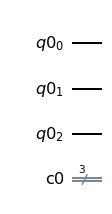

In [7]:
        circuit.draw(output='mpl')

## Example

# Exercise 2: Reproduce this NB with 3 qubits, use the simulator and the quantum computer.

In [8]:
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

## Apply a gate in the circuit

We apply the Hadamard gate (H-gate is _superposition_ same probability):
1. circuit.h(qr): for all quantum registers
2. circuit.h(qr[i]): for the i-quantum register.

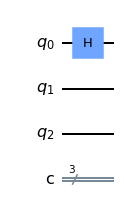

In [9]:
circuit.h(qr[0])
circuit.draw(output='mpl')

## Multiqbit Gates

We add the X-gate (control not or control-X, which is entanglement):
1. circuit.cx[qr[0],qr[1]].

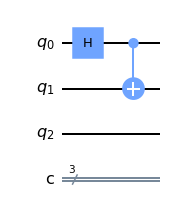

In [10]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

Now, we measure:

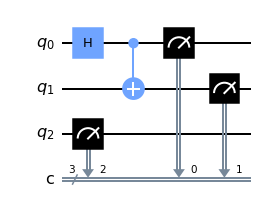

In [11]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Concepts

1. Backend is the environment where we can simulate one quantum computer.
2. Pay (time or money) in the tons of works before yours.

## Some quantum computers:
- ibmq_16_melbourne
- ibmq_london
- etc.

We create the _backend_:

In [12]:
for backend in Aer.backends():
    print(backend.name())

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [13]:
bcknd = Aer.get_backend('qasm_simulator')

We execute and get the result:

In [14]:
rslt = execute(circuit, backend=bcknd).result()

And call the modules/libraries to plot the histogram

In [15]:
from qiskit.tools.visualization import plot_histogram

Draw the histogram

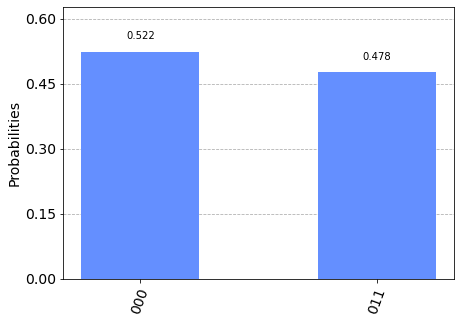

In [16]:
plot_histogram(rslt.get_counts(circuit))

# New quantum simulator
# Exercise 3. Use another provider.

In [17]:
bcknd = Aer.get_backend('aer_simulator')
rslt = execute(circuit, backend=bcknd).result()

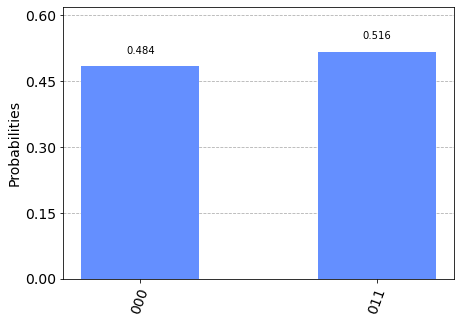

In [18]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(rslt.get_counts(circuit))

## How to use the Quantum Computer real

We are going to connect with ourself account (I changed my token, you should do same)

# Exercise 1: Use your account, and your token and re run this NB.

In [19]:
IBMQ.save_account('')

In [20]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

We can see different quantum computers to execute the algorithm/circuit.

In [21]:
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Remember it is important to know the quantum computer arqchitecture.
**Hint:** go to ref. 4 to see the jobs in the computing.

In [22]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')

Execute the circuit in the quantum computer.

In [23]:
job=execute(circuit, backend=qcomp)

import the tools to show the results

In [24]:
from qiskit.tools.monitor import job_monitor

To know the job status.

In [25]:
job_monitor(job)

Job Status: job has successfully run


Assign the result to new variable.

In [26]:
rslt=job.result()

Draw the histogram

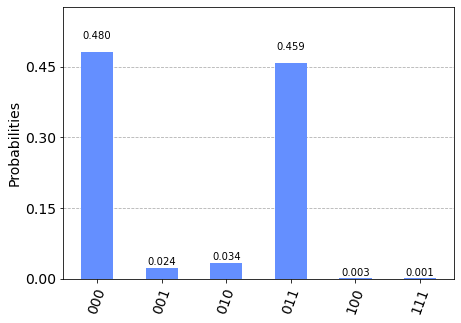

In [27]:
plot_histogram(rslt.get_counts(circuit))

# New quantum provider for real Quantum Computer
# Exercise 3. Use another provider.

In [28]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_quito')
job=execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


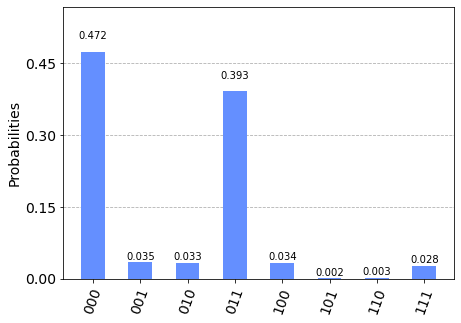

In [29]:
rslt=job.result()
plot_histogram(rslt.get_counts(circuit))

# Exercise

1. Use your account, and your token and re run this NB. 
2. Reproduce this NB with 3 qubits, use the simulator and the quantum computer.
3. Use another provider.
4. Compare and analyze your results. 
5. Write a report. Instructions during the course.

I left some gifs to help with the token and the provider selection.

# Exercise 4: Compare and analyze your results.
# Exercise 5: Write a report. Instructions during the course.

# Report on results:
The outputs from the quantum simulatior provider 'ibmq_belem' shows the probability for getting 000-0.480, 001-0.024, 010-0.034, 011-0.459, 100-0.003 and 111-0.001. The outputs from the quantum simulatior provider 'ibmq_quito' shows the probability for getting 000-0.472, 001-0.035, 010-0.033, 011-0.393, 100-0.034, 101-0.002, 110-0.003 and 111-0.028. The quantum providers output seems to changing on each different runs. If the probability of a certain state is minimal the histogram graph does not seem to be plotting it. The difference in the probability might be depentdent on providers and different runs for the quantum circuit simulation.
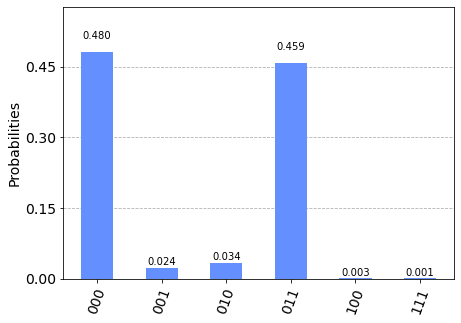
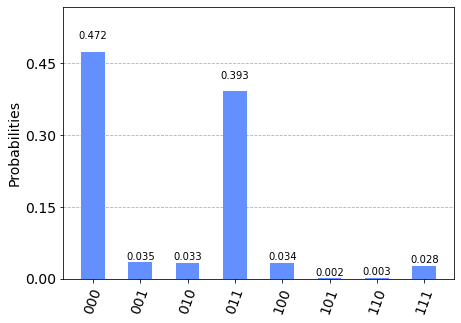

<img src="../GIF/quantumIBM_token_a.gif" width="350" align="center">

<img src="../GIF/quantumIBM_token_B.gif" width="350" align="center">

In [30]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

python version:  3.9.7
qiskit==0.37.0
qiskit-aer==0.10.4
qiskit-ibmq-provider==0.19.2
qiskit-terra==0.21.0


#### References


1. Qiskit tutorial: https://qiskit.org/documentation/install.html
2. Github tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials
3. youtube video: https://www.youtube.com/watch?v=L4jYKGrxKRE&feature=youtu.be
4. IBM account: https://quantum-computing.ibm.com/
<!--
https://quantum-computing.ibm.com/
My count with gmail in ciencias.unam
and Github
-->